## **Definições iniciais**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
dt = 0.05
tf = 50
t = np.arange(0, tf, dt)

J = 0.01 #kgm²
b = 0.019 #Nms
Ke = 0.01 #V/rad/s
Kt = 0.01 #Nm/Amp
R = 1 #Ohm
L = 0.5 #H

v = 5 #V

## **Questão 1**

### [ a ]

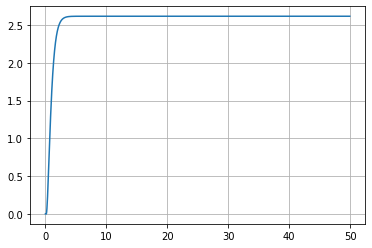

In [14]:
i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))
theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    i_p[k+1]      = (1/L)*(v - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

plt.plot(t, theta_p)
plt.grid()

### [ b ]

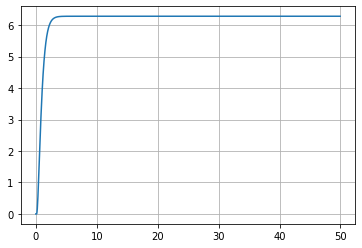

In [15]:
v_max = 12 #alteracao da tensao para a maxima para analisar a velocidade angular

i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))
theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    i_p[k+1]      = (1/L)*(v_max - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

plt.plot(t, theta_p)
plt.grid()

### Perguntas

#### [ i ]

In [16]:
#valor gerado com v_max = 12

theta_p[500]/np.pi # 1.94 pi (rad/s)

1.9998526880657008

Não, a velocidade máxima dele é de cerca de 2 $\pi$ rad/s.

## **Questão 2**

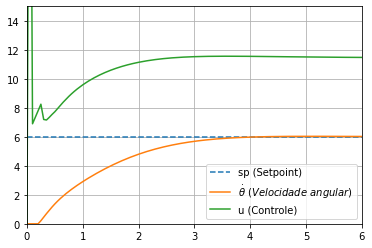

In [17]:
Kp = 1
Ki = 1.5
Kd = 0.3

sp = 6*np.ones(np.size(t))
u = np.zeros(np.size(t))

erro = 0
erro_old = 0
erro_i = 0

theta_p = np.zeros(np.size(t))
theta_pp = np.zeros(np.size(t))
i = np.zeros(np.size(t))
i_p = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):

    theta_pp[k+1] = (1/J) * (Kt*i[k] - b*theta_p[k])
    theta_p[k+1]  = theta_p[k] + theta_pp[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p[k+1]      = (1/L)*(u[k] - R*i[k] - Ke*theta_p[k])
    i [k+1]       = i[k] + i_p[k]*dt

    erro = sp[k] - theta_p[k]
    erro_d = (erro - erro_old)/dt
    erro_i = erro_i + erro*dt
    erro_old = erro

    u[k+1] = Kp*erro + Ki*erro_i + Kd*erro_d
    
    
plt.plot(t, sp, '--', label='sp (Setpoint)')
plt.plot(t, theta_p, '-', label = '$\dot{\\theta} \,\, (Velocidade \,\,  angular)$')
plt.plot(t, u, '-', label = 'u (Controle)')
plt.xlim([0, 6])
plt.ylim([0, 15])
plt.legend()
plt.grid()

### Perguntas

#### [ i ]

Não, ela demora cerca de 4 segundos para atingir o setpoint (4).

#### [ ii ]

Cerca de 4 segundos.

#### [ iii ]

Acionamento com PWM variável acionando uma ponte h que direciona a tensão para o motor.

## **Questão 3**

### [ a ]

In [3]:
u = 0.1 #m/s
w = 0 #rad/s
R2 = 0.035 #m
L2 = 0.28 #m

wd = (2*u + w*L2)/(2*R2)
we = (2*u - w*L2)/(2*R2)

print(" Wd: %.2f rad/s \n We: %.2f rad/s" % (wd, we))

 Wd: 2.86 rad/s 
 We: 2.86 rad/s


### [ b ]

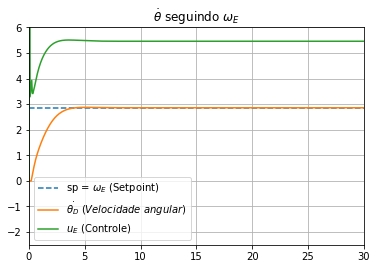

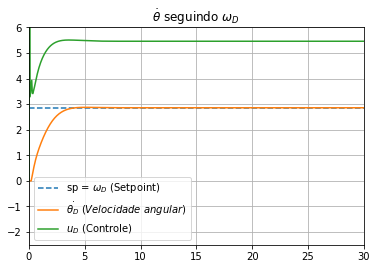

In [6]:
Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))

we = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))

erro_E = 0
erro_old_E = 0
erro_i_E = 0

erro_D = 0
erro_old_D = 0
erro_i_D = 0

theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))

theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]       = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]       = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D

plt.figure(1)
plt.plot(t, we, '--', label='sp = $\omega_E$ (Setpoint)')
plt.plot(t, theta_p_E, '-', label = '$\dot{\\theta_D} \,\, (Velocidade \,\, angular)$')
plt.plot(t, u_E, '-', label = '$u_E$ (Controle)')
plt.xlim([0, 30])
plt.ylim([-2.5, 6])
plt.legend()
plt.title("$\dot{\\theta}$ seguindo $\omega_E$")
plt.grid()

plt.figure(2)
plt.plot(t, wd, '--', label='sp = $\omega_D$ (Setpoint)')
plt.plot(t, theta_p_D, '-', label = '$\dot{\\theta_D} \,\, (Velocidade \,\, angular)$')
plt.plot(t, u_D, '-', label = '$u_D$ (Controle)')
plt.xlim([0, 30])
plt.ylim([-2.5, 6])
plt.legend()
plt.title("$\dot{\\theta}$ seguindo $\omega_D$")
plt.grid()

### [ c ]

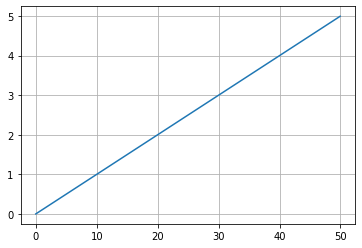

In [10]:
u = 0.1
x = np.zeros(np.size(t))

for k in range(0, np.size(t)-1):
    x[k+1] = x[k] + u*dt

plt.plot(t, x)
plt.grid()

O avanço da posição seria obtido pela integral da aceleração $\dot{x}$, uma resposta linear e instantânea (por esse método).

### [ d ]

A coordenada x será dependente do tempo, em t = 100s x(t) -> x(100) = 0.37


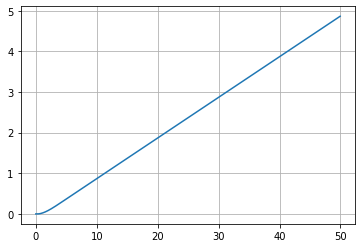

In [42]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

phi_p = np.zeros(np.size(t))
phi = np.zeros(np.size(t))
x_p = np.zeros(np.size(t))
x = np.zeros(np.size(t))

u = 0.1

we = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D

    phi_p[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi[k])
    
    phi[k+1] = phi[k] + phi_p[k]*dt
    x[k+1] = x[k] + x_p[k]*dt

plt.plot(t, x)
plt.grid()

print("A coordenada x será dependente do tempo, em t = 100s x(t) -> x(100) = %.2f" % (x[100]))

### Pergunta

O método de realimentação comum define os valores considerando que o robô conseguirá assumir as velocidades estipuladas instantaneamente, fato que não acontece. 

Quando utilizamos a realimentação com odometria os valores demoram mais para serem fisicamente definidos no robô e, por consequência, o movimento demora um pouco mais para acontecer seguindo os parâmetros de velocidade que são desejados.

## **Questão 4**

### [ a ]
É possível atingir u = 0.1 m/s e $\omega$ = 0.1 rad/s?

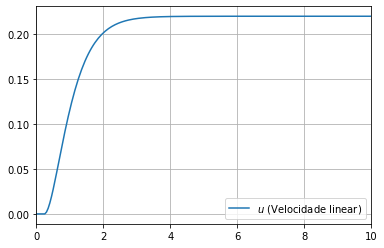

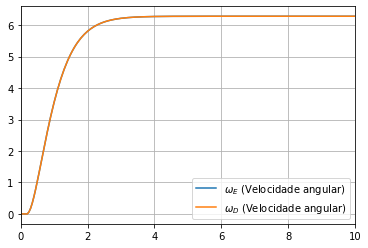

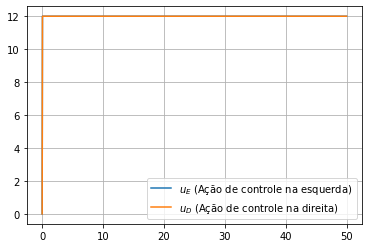

In [84]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

Kp_E = 1
Ki_E = 1.5
Kd_E = 0.3

Kp_D = 1
Ki_D = 1.5
Kd_D = 0.3

i_E = np.zeros(np.size(t))
i_p_E = np.zeros(np.size(t))
theta_p_E = np.zeros(np.size(t))
theta_pp_E = np.zeros(np.size(t))
i_D = np.zeros(np.size(t))
i_p_D = np.zeros(np.size(t))
theta_p_D = np.zeros(np.size(t))
theta_pp_D = np.zeros(np.size(t))

u_E = np.zeros(np.size(t))
u_D = np.zeros(np.size(t))
u_max = 12

erro_E = 0
erro_old_E = 0
erro_i_E = 0
erro_d_E = 0
erro_D = 0
erro_old_D = 0
erro_i_D = 0
erro_d_D = 0

phi_p = np.zeros(np.size(t))
phi = np.zeros(np.size(t))
x_p = np.zeros(np.size(t))
x = np.zeros(np.size(t))

u = 0.5

we = ((2*u - w*L2)/(2*R2))*np.ones(np.size(t))
wd = ((2*u + w*L2)/(2*R2))*np.ones(np.size(t))

for k in range(0, np.size(t)-1):
    #ESQUERDO

    theta_pp_E[k+1] = (1/J) * (Kt*i_E[k] - b*theta_p_E[k])
    theta_p_E[k+1]  = theta_p_E[k] + theta_pp_E[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_E[k+1]      = (1/L)*(u_E[k] - R*i_E[k] - Ke*theta_p_E[k])
    i_E[k+1]        = i_E[k] + i_p_E[k]*dt

    erro_E = we[k] - theta_p_E[k]
    erro_d_E = (erro_E - erro_old_E)/dt
    erro_i_E = erro_i_E + erro_E*dt
    erro_old_E = erro_E

    u_E[k+1] = Kp_E*erro_E + Ki_E*erro_i_E + Kd_E*erro_d_E
    if abs(u_E[k+1])>12:
        if u_E[k+1]>0:
            u_E[k+1] = u_max
        else:
            u_E[k+1] = -u_max

    #DIREITO

    theta_pp_D[k+1] = (1/J) * (Kt*i_D[k] - b*theta_p_D[k])
    theta_p_D[k+1]  = theta_p_D[k] + theta_pp_D[k]*dt
    #ação de controle u[k] aplicada como a tensão V para
    #estabilizar a velocidade no setpoint
    i_p_D[k+1]      = (1/L)*(u_D[k] - R*i_D[k] - Ke*theta_p_D[k])
    i_D[k+1]        = i_D[k] + i_p_D[k]*dt

    erro_D = wd[k] - theta_p_D[k]
    erro_d_D = (erro_D - erro_old_D)/dt
    erro_i_D = erro_i_D + erro_D*dt
    erro_old_D = erro_D

    u_D[k+1] = Kp_D*erro_D + Ki_D*erro_i_D + Kd_D*erro_d_D
    if abs(u_D[k+1])>12:
        if u_D[k+1]>0:
            u_D[k+1] = u_max
        else:
            u_D[k+1] = -u_max

    phi_p[k+1] = (R2/L2)*(theta_p_D[k] - theta_p_E[k])
    x_p[k+1] = (R2/2)*(theta_p_D[k] + theta_p_E[k])*np.cos(phi[k])
    
    phi[k+1] = phi[k] + phi_p[k]*dt
    x[k+1] = x[k] + x_p[k]*dt

plt.figure(1)
plt.plot(t, x_p, label='$u$ (Velocidade linear)')
plt.legend()
plt.grid()
plt.xlim([0, 10])

plt.figure(2)
plt.plot(t, theta_p_E, label='$\omega_E$ (Velocidade angular)')
plt.plot(t, theta_p_D, label='$\omega_D$ (Velocidade angular)')
plt.legend()
plt.grid()
plt.xlim([0, 10])

plt.figure(3)
plt.plot(t, u_E, label='$u_E$ (Ação de controle na esquerda)')
plt.plot(t, u_D, label='$u_D$ (Ação de controle na direita)')
plt.grid()
plt.legend()
# plt.xlim([0, 10])